## Training data reading (Local TFRecords)

### For activity_net features, please refer to jpgs2tfrecord_untrimmed.py

In [1]:
import numpy as np
import tensorflow as tf
import preprocessing
from PIL import Image
%matplotlib inline
from matplotlib.pyplot import imshow

/Users/tangyongyi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [27]:
preproc_train = preprocessing.ImagePreprocessor(
            height=256,
            width=256,
            batch_size=1,
            device_count=1,
            data_type='rgb')

In [28]:
images, labels = preproc_train.minibatch('/Users/tangyongyi/Documents/codes/activitynet/kinetics_data_processing/output_tmp/videos/wh_KoZY_K1A.tfrecords')

In [47]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    print("Write cropped and resized image to the folder './resized_image'") 
    images_, labels_ = sess.run([images, labels])
#     print(cropped_img_.shape)
#     img = Image.fromarray(np.asarray(cropped_img_[1],dtype=np.uint8), "RGB")
#     print(img)
#     imshow(img)
    coord.request_stop()
    coord.join(threads)
    sess.close()

Write cropped and resized image to the folder './resized_image'


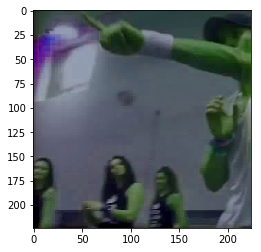

In [48]:
img = Image.fromarray(np.asarray(images_[0][0,0,:],dtype=np.uint8), "RGB")
imshow(img) # Images' color may be distort by the 'distort_color' function.

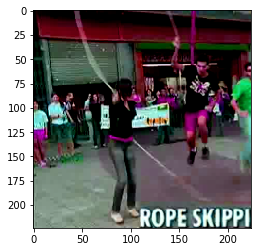

In [21]:
img = Image.fromarray(np.asarray(images_[0][0,1,:],dtype=np.uint8), "RGB")
imshow(img)

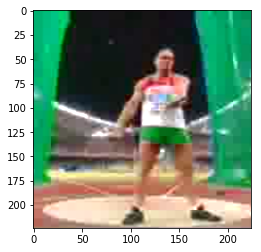

In [17]:
img = Image.fromarray(np.asarray(images_[0][0,-1,:],dtype=np.uint8), "RGB")
imshow(img)

## Test the flow image

In [49]:
preproc_train = preprocessing.ImagePreprocessor(
            height=256,
            width=256,
            batch_size=1,
            device_count=1,
            data_type='flow')
images, labels = preproc_train.minibatch('/Users/tangyongyi/Documents/codes/activitynet/kinetics_data_processing/output_tmp/videos/wh_KoZY_K1A.tfrecords')

In [50]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    print("Write cropped and resized image to the folder './resized_image'") 
    images_, labels_ = sess.run([images, labels])
#     print(cropped_img_.shape)
#     img = Image.fromarray(np.asarray(cropped_img_[1],dtype=np.uint8), "RGB")
#     print(img)
#     imshow(img)
    coord.request_stop()
    coord.join(threads)
    sess.close()

Write cropped and resized image to the folder './resized_image'


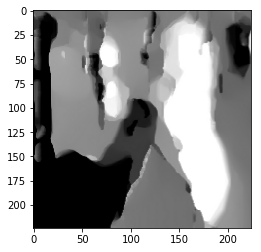

In [51]:
img = Image.fromarray(np.asarray(images_[0][0,0,:,:,0]))
imshow(img, cmap='gray')

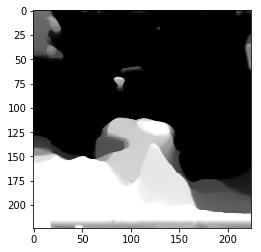

In [52]:
img = Image.fromarray(np.asarray(images_[0][0,0,:,:,1]))
imshow(img, cmap='gray')

## Test data reading (HDFS TFRecords)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.python.platform import gfile
import os
hdfs_path = 'hdfs://100.110.18.133:900/user/VideoAI/rextang/activity_net/videos/trimmed/tfrecords/validation/QeL3ScQVelo_01_of_01.tfrecords'
# filenames = gfile.Glob(os.path.join('./output', '*.tfrecords'))
filename_queue = tf.train.string_input_producer([hdfs_path], shuffle=False)
reader = tf.TFRecordReader()
serialized_key, serialized_example = reader.read(filename_queue)
## For more feature, please refer to preprocessing.py
features = tf.parse_single_example(serialized_example, features={
    'audio': tf.FixedLenFeature([], tf.string)
})
audio_raw = tf.image.decode_raw(features['audio'], tf.float32)
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    print("Write cropped and resized image to the folder './resized_image'")
    audio_ = sess.run(audio_raw)
    print(audio_.shape) # If you can print the shape, it's done!
    coord.request_stop()
    coord.join(threads)
    sess.close()